### Business Problem
Develop a Clustering model using behavioral variables of 9,000 active credit card users to inform and refine marketing strategies. The analysis leveraged 18 distinct behavioral metrics over a six-month period, facilitating the development of tailored engagement approaches for different user segments.

### Data Extraction

##### Unzip and load the data

In [4]:
import zipfile
import os

print("Current Working Directory: ", os.getcwd())
os.chdir('/Users/eshithahemakumar/Documents/Eshitha/ML/Classification/Data')
print("New Working Directory: ", os.getcwd())

zip_file_path = 'archive.zip'
extract_to_dir = '.'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_dir)

Current Working Directory:  /Users/eshithahemakumar/Documents/Eshitha/ML/Classification
New Working Directory:  /Users/eshithahemakumar/Documents/Eshitha/ML/Classification/Data


In [116]:
import os
os.chdir('/Users/eshithahemakumar/Documents/Eshitha/ML/Classification/Data')
print(os.getcwd())

/Users/eshithahemakumar/Documents/Eshitha/ML/Classification/Data


In [117]:
import pandas as pd

file_dir = os.getcwd()
file_path = os.path.join(file_dir, 'CC GENERAL.csv')
customer_cc_data = pd.read_csv(file_path)

### Exploratory Data Analysis

##### Descriptive Statistics

In [118]:
# Look at the data
print(customer_cc_data)

# Descriptive Statistics
print(customer_cc_data.describe())
print(customer_cc_data.info())

# Missing values
print(customer_cc_data.isna().sum())

# Duplicate values
print(customer_cc_data.duplicated().any())

     CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0       

1 missing value in credit limit and 313 missing values in minimum payments

##### Correlations

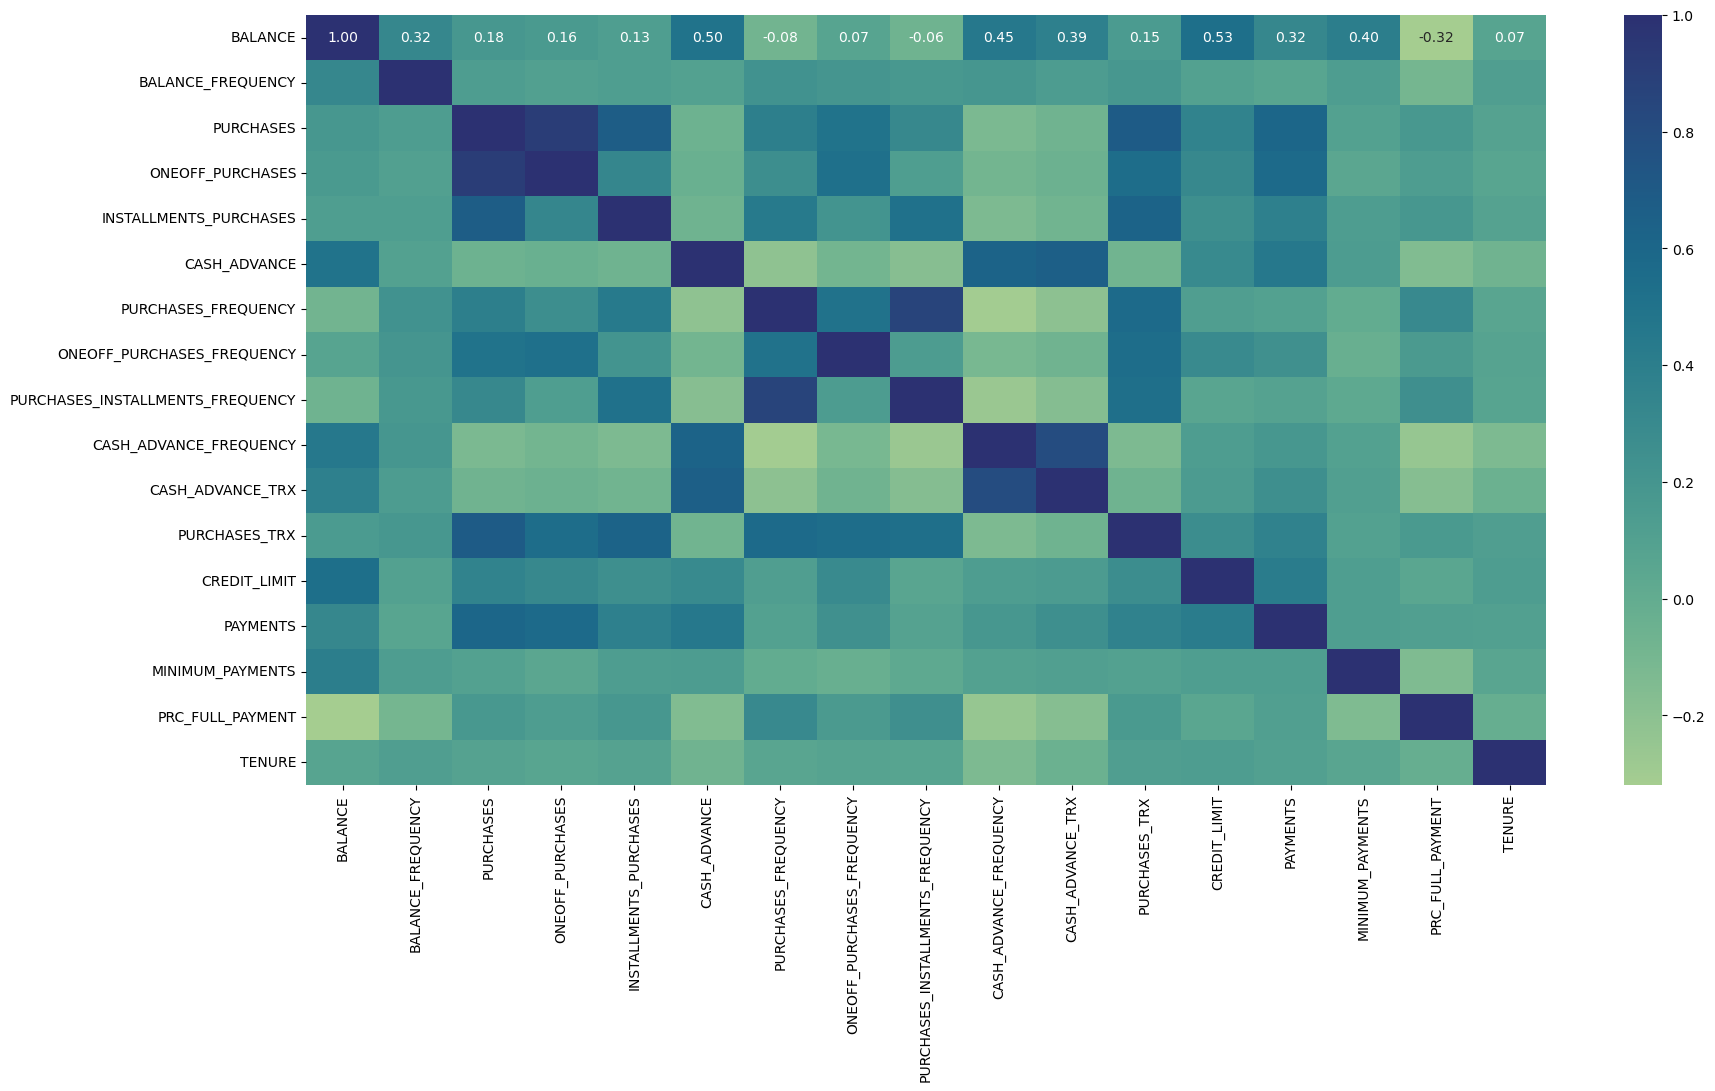

In [119]:
import pandas as pd

# Calculate the correlation matrix
customer_cc_data = customer_cc_data.drop("CUST_ID", axis=1)
corr_matrix = customer_cc_data.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='crest')

# Show the plot
plt.show()

##### Top Correlations 

In [120]:
corr_unstacked = corr_matrix.unstack()

# Filter out the diagonal correlations (which are always 1)and the lower triangle of the matrix, since it's a mirror of the upper
corr_filtered = corr_unstacked[(corr_unstacked.index.get_level_values(0) < corr_unstacked.index.get_level_values(1))]

# Sort the values, and get the top correlations
top_correlations = corr_filtered.sort_values(ascending=False)

# Display the top 10 correlation pairs
print(top_correlations.head(10))

ONEOFF_PURCHASES        PURCHASES                           0.916845
PURCHASES_FREQUENCY     PURCHASES_INSTALLMENTS_FREQUENCY    0.862934
CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX                    0.799561
PURCHASES               PURCHASES_TRX                       0.689561
INSTALLMENTS_PURCHASES  PURCHASES                           0.679896
CASH_ADVANCE            CASH_ADVANCE_TRX                    0.656498
                        CASH_ADVANCE_FREQUENCY              0.628522
INSTALLMENTS_PURCHASES  PURCHASES_TRX                       0.628108
PAYMENTS                PURCHASES                           0.603264
PURCHASES_FREQUENCY     PURCHASES_TRX                       0.568430
dtype: float64


##### Skewness and Distributions

In [121]:
customer_cc_data.skew()

BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522464
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.622797
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64

Most data columns have skewed distributions

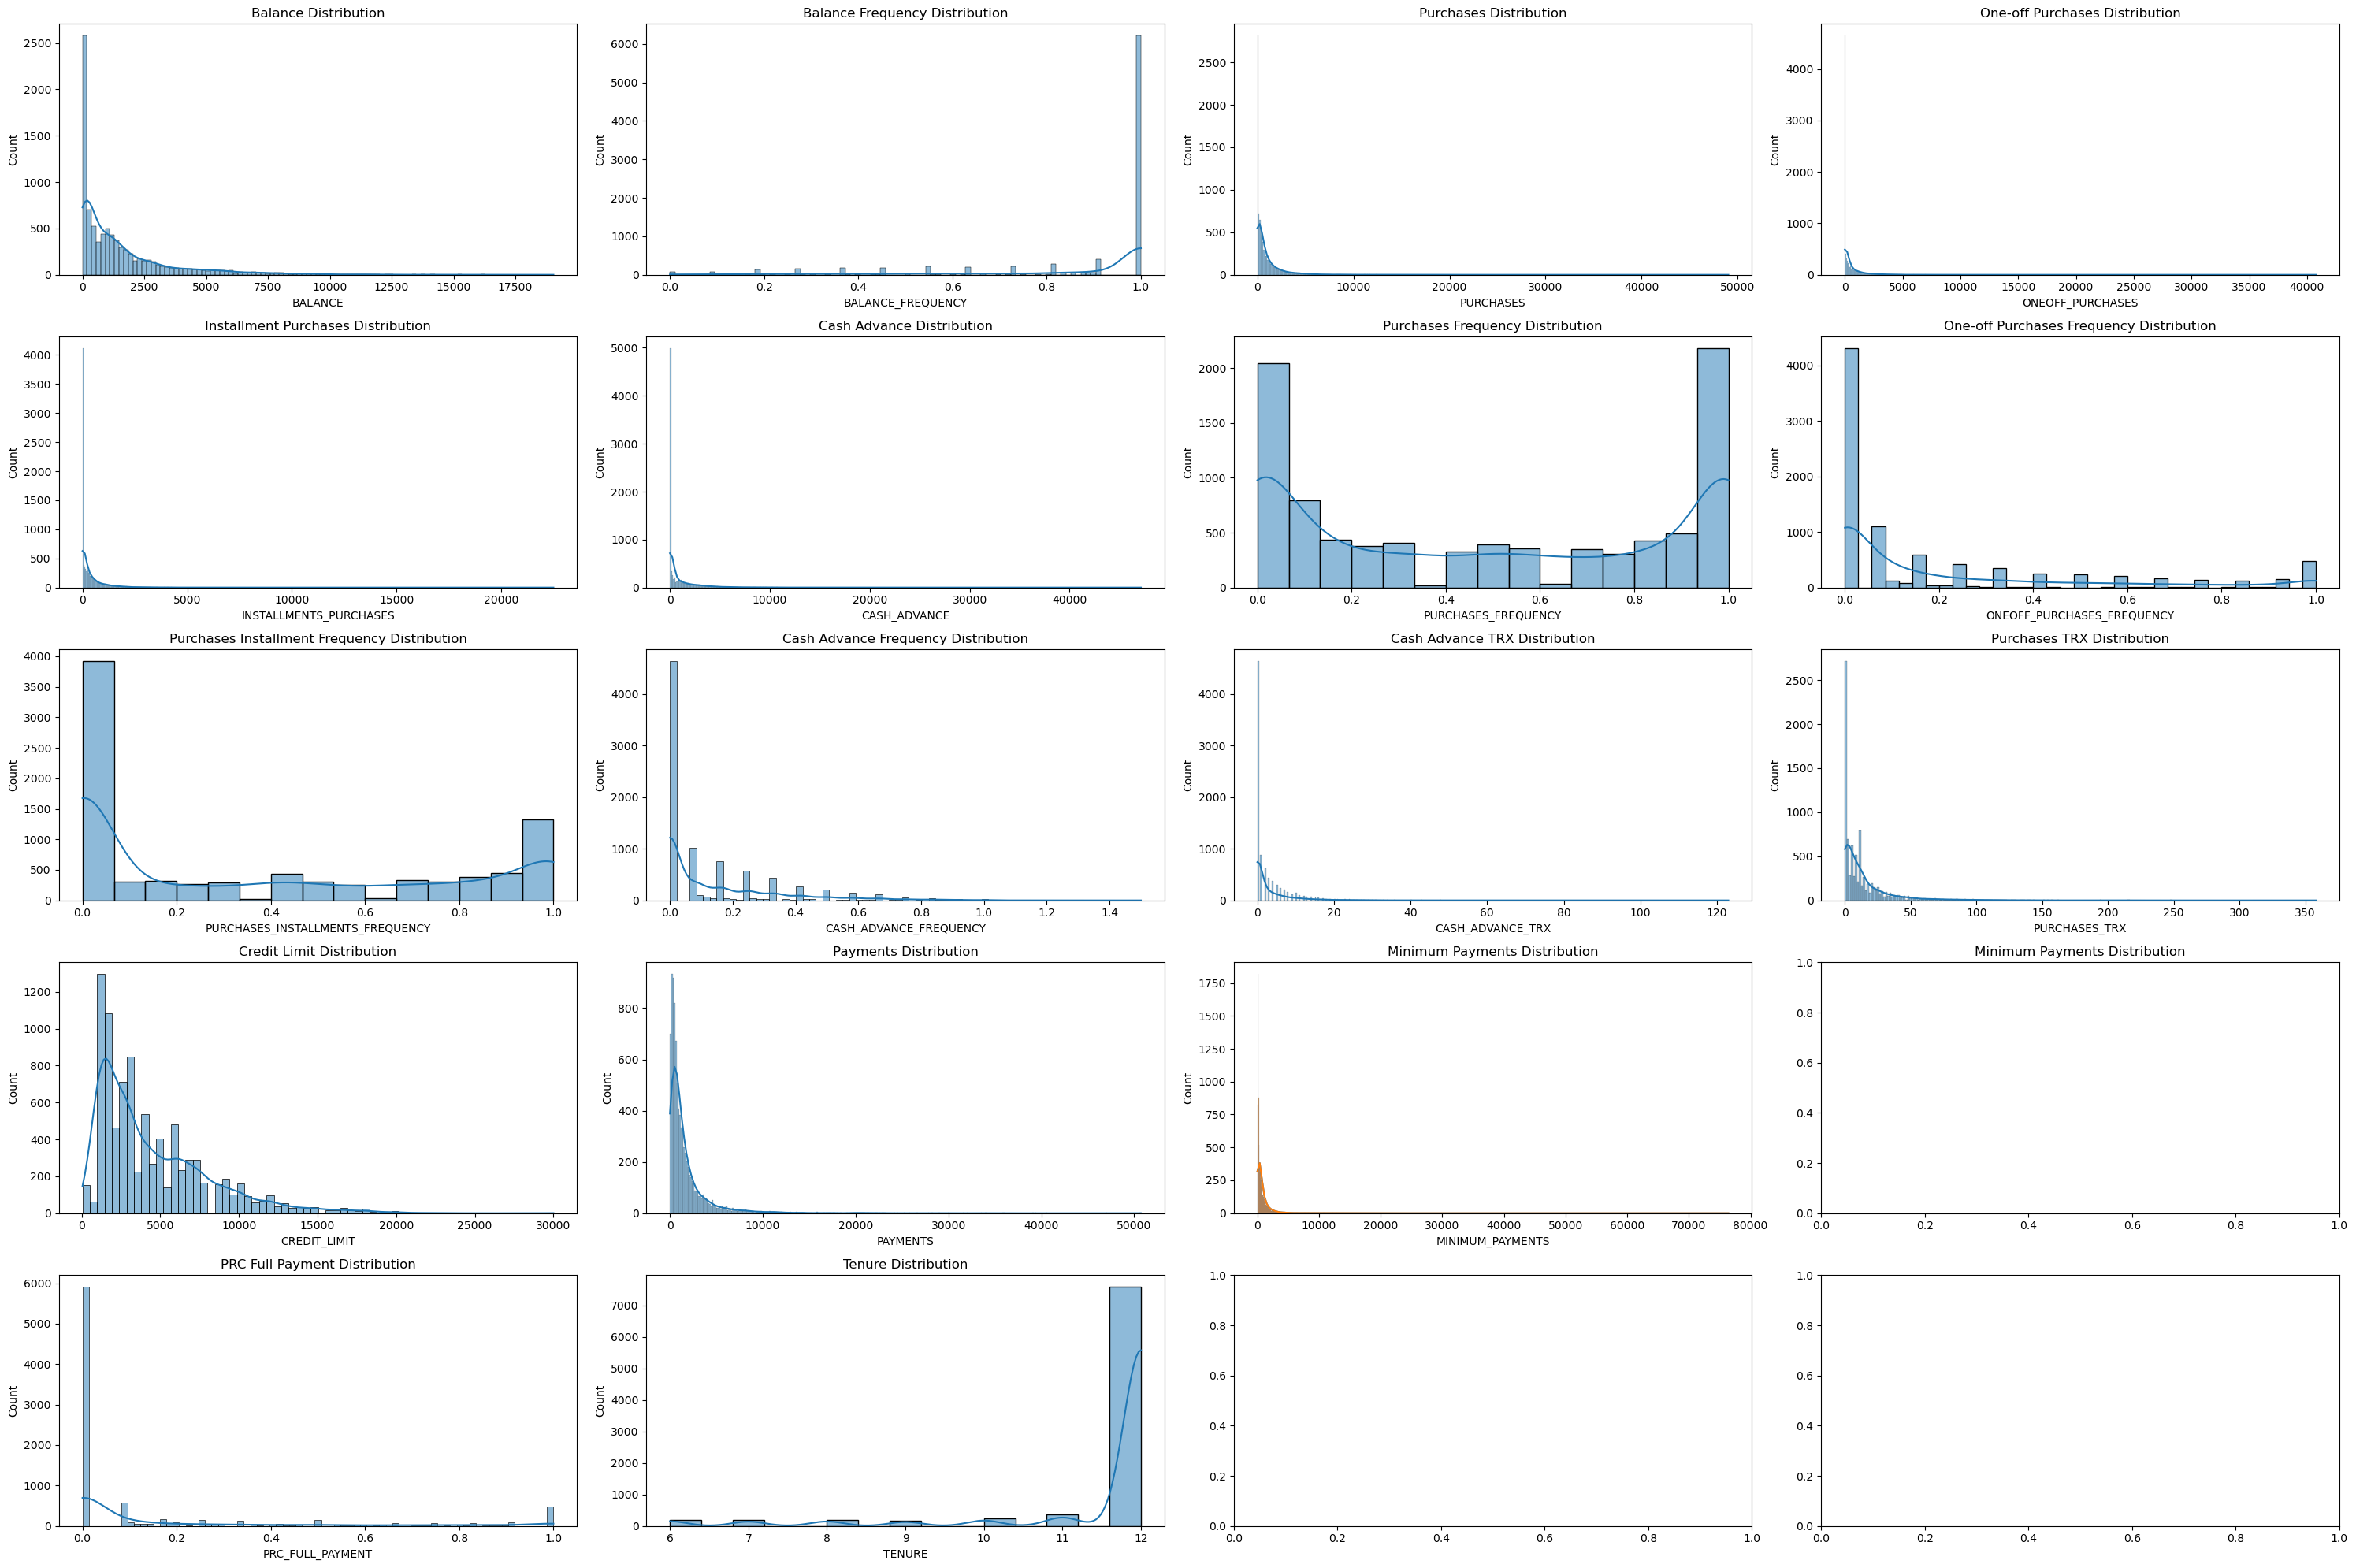

In [122]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore')

fig, axes = plt.subplots(5, 4, figsize=(30, 20))  

sns.histplot(customer_cc_data['BALANCE'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Balance Distribution')

sns.histplot(customer_cc_data['BALANCE_FREQUENCY'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Balance Frequency Distribution')

sns.histplot(customer_cc_data['PURCHASES'], kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Purchases Distribution')

sns.histplot(customer_cc_data['ONEOFF_PURCHASES'], kde=True, ax=axes[0, 3])
axes[0, 3].set_title('One-off Purchases Distribution')

sns.histplot(customer_cc_data['INSTALLMENTS_PURCHASES'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Installment Purchases Distribution')

sns.histplot(customer_cc_data['CASH_ADVANCE'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Cash Advance Distribution')

sns.histplot(customer_cc_data['PURCHASES_FREQUENCY'], kde=True, ax=axes[1, 2])
axes[1, 2].set_title('Purchases Frequency Distribution')

sns.histplot(customer_cc_data['ONEOFF_PURCHASES_FREQUENCY'], kde=True, ax=axes[1, 3])
axes[1, 3].set_title('One-off Purchases Frequency Distribution')

sns.histplot(customer_cc_data['PURCHASES_INSTALLMENTS_FREQUENCY'], kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Purchases Installment Frequency Distribution')

sns.histplot(customer_cc_data['CASH_ADVANCE_FREQUENCY'], kde=True, ax=axes[2, 1])
axes[2, 1].set_title('Cash Advance Frequency Distribution')

sns.histplot(customer_cc_data['CASH_ADVANCE_TRX'], kde=True, ax=axes[2, 2])
axes[2, 2].set_title('Cash Advance TRX Distribution')

sns.histplot(customer_cc_data['PURCHASES_TRX'], kde=True, ax=axes[2, 3])
axes[2, 3].set_title('Purchases TRX Distribution')

sns.histplot(customer_cc_data['CREDIT_LIMIT'], kde=True, ax=axes[3, 0])
axes[3, 0].set_title('Credit Limit Distribution')

sns.histplot(customer_cc_data['PAYMENTS'], kde=True, ax=axes[3, 1])
axes[3, 1].set_title('Payments Distribution')

sns.histplot(customer_cc_data['MINIMUM_PAYMENTS'], kde=True, ax=axes[3, 2])
axes[3, 2].set_title('Minimum Payments Distribution')

sns.histplot(customer_cc_data['MINIMUM_PAYMENTS'], kde=True, ax=axes[3, 2])
axes[3, 3].set_title('Minimum Payments Distribution')

sns.histplot(customer_cc_data['PRC_FULL_PAYMENT'], kde=True, ax=axes[4, 0])
axes[4, 0].set_title('PRC Full Payment Distribution')

sns.histplot(customer_cc_data['TENURE'], kde=True, ax=axes[4, 1])
axes[4, 1].set_title('Tenure Distribution')

plt.tight_layout() 
plt.show()

### Data Preprocessing

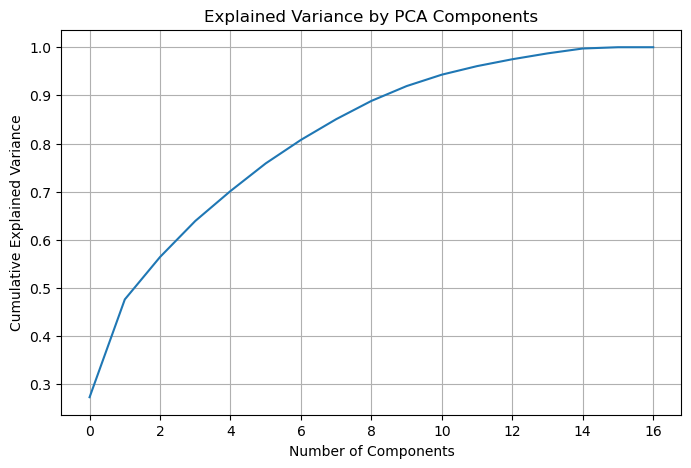

In [123]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Impute missing values. Median used due to skewness. 
customer_cc_data.fillna(customer_cc_data.median(), inplace = True)

# Scale column values
scaler = StandardScaler()
scaled_features = scaler.fit_transform (customer_cc_data)

# PCA
pca = PCA().fit(scaled_features)

# Plot the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

The curve becomes noticeably flatter after the third component with 4 components capturing more than 70% of the variance

### Comparative Analysis of Clustering Algorithms without PCA

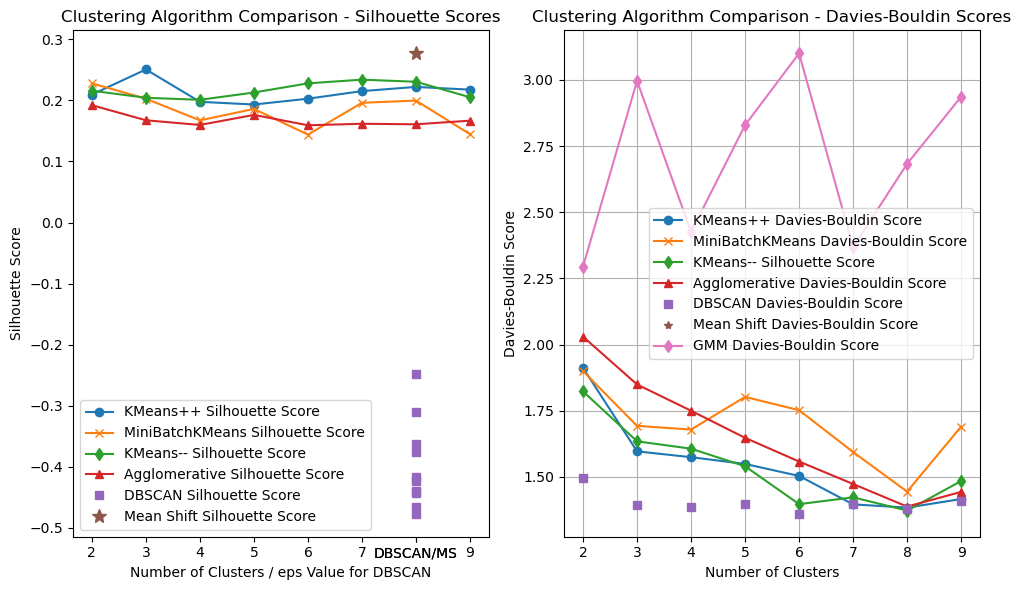

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering, DBSCAN, MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score #higher the better
from sklearn.metrics import davies_bouldin_score #lower the better
from sklearn.metrics import calinski_harabasz_score #higher the better

# Define the range of clusters to try for algorithms that need it
cluster_range = range(2, 10)

# Initialize lists to hold silhouette scores for each algorithm
kmeans_silhouette_scores = []
kmeans_without_outliers_silhouette_scores = []
minibatch_silhouette_scores = []
agglo_silhouette_scores = []
gmm_bic_scores = []
dbscan_silhouette_scores = []
mean_shift_silhouette_score = []

# Initialize lists to hold davies bouldin scores for each algorithm
kmeans_davies_bouldin_scores = []
kmeans_without_ouliers_davies_bouldin_scores = []
minibatch_davies_bouldin_scores = []
agglo_davies_bouldin_scores = []
gmm_davies_bouldin_scores = []
dbscan_davies_bouldin_scores = []
meanshift_davies_bouldin_scores = []


def remove_outliers(data, n_clusters, n_std_dev=2):
    # Fit KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data)
    
    # Find distances to the nearest centroid
    distances = kmeans.transform(data).min(axis=1)
    mean_distance = np.mean(distances)
    std_distance = np.std(distances)
    
    # Determine a threshold for outliers
    threshold = mean_distance + n_std_dev * std_distance
    
    # Filter out points that are farther than n standard deviations from the nearest centroid
    non_outliers = data[distances < threshold]
    return non_outliers


# KMeans and MiniBatchKMeans
for n_clusters in cluster_range:
    # KMeans++
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(scaled_features)
    kmeans_silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))
    kmeans_davies_bouldin_scores.append(davies_bouldin_score(scaled_features, kmeans.labels_))
    
    # Minibatch KMeans
    minibatch_kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42).fit(scaled_features)
    minibatch_silhouette_scores.append(silhouette_score(scaled_features, minibatch_kmeans.labels_))
    minibatch_davies_bouldin_scores.append(davies_bouldin_score(scaled_features, minibatch_kmeans.labels_))
    
    # KMeans--
    filtered_data = remove_outliers(scaled_features, n_clusters=n_clusters)
    kmeans_without_outliers = KMeans(n_clusters=n_clusters, random_state=42).fit(filtered_data)
    kmeans_without_outliers_silhouette_scores.append(silhouette_score(filtered_data, kmeans_without_outliers.labels_))
    kmeans_without_ouliers_davies_bouldin_scores.append(davies_bouldin_score(filtered_data, kmeans_without_outliers.labels_))
    
# AgglomerativeClustering
for n_clusters in cluster_range:
    agglo = AgglomerativeClustering(n_clusters=n_clusters).fit(scaled_features)
    agglo_silhouette_scores.append(silhouette_score(scaled_features, agglo.labels_))
    agglo_davies_bouldin_scores.append(davies_bouldin_score(scaled_features, agglo.labels_))

# GMM
for n_clusters in cluster_range:
    gmm = GaussianMixture(n_components=n_clusters, random_state=42).fit(scaled_features)
    gmm_bic_scores.append(gmm.bic(scaled_features))
    gmm_cluster_labels = gmm.predict(scaled_features)
    gmm_davies_bouldin_scores.append(davies_bouldin_score(scaled_features, gmm_cluster_labels))

# DBSCAN
eps_values = np.linspace(0.1, 1.0, 10)
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5).fit(scaled_features)
    if len(set(dbscan.labels_)) > 1: # More than one cluster, plus noise
        dbscan_silhouette_scores.append(silhouette_score(scaled_features, dbscan.labels_))
        dbscan_davies_bouldin_scores.append(davies_bouldin_score(scaled_features, dbscan.labels_))
    else:
        dbscan_silhouette_scores.append(-1) # Invalid clustering

# Mean Shift
mean_shift = MeanShift().fit(scaled_features)
mean_shift_silhouette_score = silhouette_score(scaled_features, mean_shift.labels_)
mean_shift_davies_bouldin_score  = davies_bouldin_score(scaled_features, mean_shift.labels_)
mean_shift_davies_bouldin_scores = [mean_shift_davies_bouldin_score] * len(cluster_range)

# Plotting silhouette scores and Davies-Bouldin scores side by side
plt.figure(figsize=(10, 6))

# Plotting silhouette scores
plt.subplot(1, 2, 1)
plt.plot(cluster_range, kmeans_silhouette_scores, marker='o', label='KMeans++ Silhouette Score')
plt.plot(cluster_range, minibatch_silhouette_scores, marker='x', label='MiniBatchKMeans Silhouette Score')
plt.plot(cluster_range, kmeans_without_outliers_silhouette_scores, marker='d', label='KMeans-- Silhouette Score')
plt.plot(cluster_range, agglo_silhouette_scores, marker='^', label='Agglomerative Silhouette Score')
plt.plot(np.repeat(len(cluster_range), len(eps_values)), dbscan_silhouette_scores, marker='s', label='DBSCAN Silhouette Score', linestyle='None')
plt.plot(len(cluster_range), mean_shift_silhouette_score, marker='*', markersize=10, label='Mean Shift Silhouette Score', linestyle='None')

plt.xlabel('Number of Clusters / eps Value for DBSCAN')
plt.ylabel('Silhouette Score')
plt.xticks(list(cluster_range) + [len(cluster_range)], list(cluster_range) + ['DBSCAN/MS'])
plt.legend()
plt.title('Clustering Algorithm Comparison - Silhouette Scores')

# Plotting Davies-Bouldin scores
plt.subplot(1, 2, 2)
plt.plot(cluster_range[:len(kmeans_davies_bouldin_scores)], kmeans_davies_bouldin_scores, marker='o', label='KMeans++ Davies-Bouldin Score')
plt.plot(cluster_range[:len(minibatch_davies_bouldin_scores)], minibatch_davies_bouldin_scores, marker='x', label='MiniBatchKMeans Davies-Bouldin Score')
plt.plot(cluster_range[:len(kmeans_without_ouliers_davies_bouldin_scores)], kmeans_without_ouliers_davies_bouldin_scores, marker='d', label='KMeans-- Silhouette Score')
plt.plot(cluster_range[:len(agglo_davies_bouldin_scores)], agglo_davies_bouldin_scores, marker='^', label='Agglomerative Davies-Bouldin Score')
plt.plot(cluster_range[:len(dbscan_davies_bouldin_scores)], dbscan_davies_bouldin_scores[:len(cluster_range)], marker='s', label='DBSCAN Davies-Bouldin Score', linestyle='None')
plt.plot(cluster_range[:len(meanshift_davies_bouldin_scores)], meanshift_davies_bouldin_scores, marker='*', label='Mean Shift Davies-Bouldin Score', linestyle='None')
plt.plot(cluster_range[:len(gmm_davies_bouldin_scores)], gmm_davies_bouldin_scores, marker='d', label='GMM Davies-Bouldin Score')

plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.title('Clustering Algorithm Comparison - Davies-Bouldin Scores')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Comparative Analysis of Clustering Algorithms with PCA

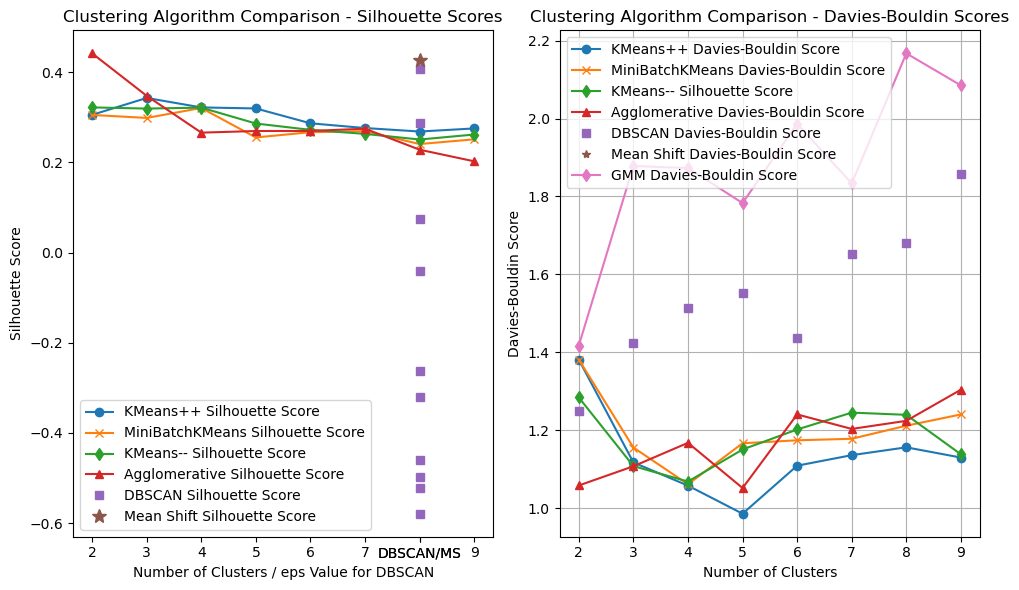

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering, DBSCAN, MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score #higher the better
from sklearn.metrics import davies_bouldin_score #lower the better
from sklearn.metrics import calinski_harabasz_score #higher the better

pca = PCA(n_components=4)
pca_features = pca.fit_transform(scaled_features)

# Define the range of clusters to try for algorithms that need it
cluster_range = range(2, 10)

# Initialize lists to hold silhouette scores for each algorithm
kmeans_silhouette_scores = []
kmeans_without_outliers_silhouette_scores = []
minibatch_silhouette_scores = []
agglo_silhouette_scores = []
gmm_bic_scores = []
dbscan_silhouette_scores = []
mean_shift_silhouette_score = []

# Initialize lists to hold davies bouldin scores for each algorithm
kmeans_davies_bouldin_scores = []
kmeans_without_ouliers_davies_bouldin_scores = []
minibatch_davies_bouldin_scores = []
agglo_davies_bouldin_scores = []
gmm_davies_bouldin_scores = []
dbscan_davies_bouldin_scores = []
meanshift_davies_bouldin_scores = []


def remove_outliers(data, n_clusters, n_std_dev=2):
    # Fit KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data)
    
    # Find distances to the nearest centroid
    distances = kmeans.transform(data).min(axis=1)
    mean_distance = np.mean(distances)
    std_distance = np.std(distances)
    
    # Determine a threshold for outliers
    threshold = mean_distance + n_std_dev * std_distance
    
    # Filter out points that are farther than n standard deviations from the nearest centroid
    non_outliers = data[distances < threshold]
    return non_outliers


# KMeans and MiniBatchKMeans
for n_clusters in cluster_range:
    # KMeans++
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(pca_features)
    kmeans_silhouette_scores.append(silhouette_score(pca_features, kmeans.labels_))
    kmeans_davies_bouldin_scores.append(davies_bouldin_score(pca_features, kmeans.labels_))
    
    # Minibatch KMeans
    minibatch_kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42).fit(pca_features)
    minibatch_silhouette_scores.append(silhouette_score(pca_features, minibatch_kmeans.labels_))
    minibatch_davies_bouldin_scores.append(davies_bouldin_score(pca_features, minibatch_kmeans.labels_))
    
    # KMeans--
    filtered_data = remove_outliers(pca_features, n_clusters=n_clusters)
    kmeans_without_outliers = KMeans(n_clusters=n_clusters, random_state=42).fit(filtered_data)
    kmeans_without_outliers_silhouette_scores.append(silhouette_score(filtered_data, kmeans_without_outliers.labels_))
    kmeans_without_ouliers_davies_bouldin_scores.append(davies_bouldin_score(filtered_data, kmeans_without_outliers.labels_))
    
# AgglomerativeClustering
for n_clusters in cluster_range:
    agglo = AgglomerativeClustering(n_clusters=n_clusters).fit(pca_features)
    agglo_silhouette_scores.append(silhouette_score(pca_features, agglo.labels_))
    agglo_davies_bouldin_scores.append(davies_bouldin_score(pca_features, agglo.labels_))

# GMM
for n_clusters in cluster_range:
    gmm = GaussianMixture(n_components=n_clusters, random_state=42).fit(pca_features)
    gmm_bic_scores.append(gmm.bic(pca_features))
    gmm_cluster_labels = gmm.predict(pca_features)
    gmm_davies_bouldin_scores.append(davies_bouldin_score(pca_features, gmm_cluster_labels))

# DBSCAN
eps_values = np.linspace(0.1, 1.0, 10)
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5).fit(pca_features)
    if len(set(dbscan.labels_)) > 1: # More than one cluster, plus noise
        dbscan_silhouette_scores.append(silhouette_score(pca_features, dbscan.labels_))
        dbscan_davies_bouldin_scores.append(davies_bouldin_score(pca_features, dbscan.labels_))
    else:
        dbscan_silhouette_scores.append(-1) # Invalid clustering

# Mean Shift
mean_shift = MeanShift().fit(pca_features)
mean_shift_silhouette_score = silhouette_score(pca_features, mean_shift.labels_)
mean_shift_davies_bouldin_score  = davies_bouldin_score(pca_features, mean_shift.labels_)
mean_shift_davies_bouldin_scores = [mean_shift_davies_bouldin_score] * len(cluster_range)

# Plotting silhouette scores and Davies-Bouldin scores side by side
plt.figure(figsize=(10, 6))

# Plotting silhouette scores
plt.subplot(1, 2, 1)
plt.plot(cluster_range, kmeans_silhouette_scores, marker='o', label='KMeans++ Silhouette Score')
plt.plot(cluster_range, minibatch_silhouette_scores, marker='x', label='MiniBatchKMeans Silhouette Score')
plt.plot(cluster_range, kmeans_without_outliers_silhouette_scores, marker='d', label='KMeans-- Silhouette Score')
plt.plot(cluster_range, agglo_silhouette_scores, marker='^', label='Agglomerative Silhouette Score')
plt.plot(np.repeat(len(cluster_range), len(eps_values)), dbscan_silhouette_scores, marker='s', label='DBSCAN Silhouette Score', linestyle='None')
plt.plot(len(cluster_range), mean_shift_silhouette_score, marker='*', markersize=10, label='Mean Shift Silhouette Score', linestyle='None')

plt.xlabel('Number of Clusters / eps Value for DBSCAN')
plt.ylabel('Silhouette Score')
plt.xticks(list(cluster_range) + [len(cluster_range)], list(cluster_range) + ['DBSCAN/MS'])
plt.legend()
plt.title('Clustering Algorithm Comparison - Silhouette Scores')

# Plotting Davies-Bouldin scores
plt.subplot(1, 2, 2)
plt.plot(cluster_range[:len(kmeans_davies_bouldin_scores)], kmeans_davies_bouldin_scores, marker='o', label='KMeans++ Davies-Bouldin Score')
plt.plot(cluster_range[:len(minibatch_davies_bouldin_scores)], minibatch_davies_bouldin_scores, marker='x', label='MiniBatchKMeans Davies-Bouldin Score')
plt.plot(cluster_range[:len(kmeans_without_ouliers_davies_bouldin_scores)], kmeans_without_ouliers_davies_bouldin_scores, marker='d', label='KMeans-- Silhouette Score')
plt.plot(cluster_range[:len(agglo_davies_bouldin_scores)], agglo_davies_bouldin_scores, marker='^', label='Agglomerative Davies-Bouldin Score')
plt.plot(cluster_range[:len(dbscan_davies_bouldin_scores)], dbscan_davies_bouldin_scores[:len(cluster_range)], marker='s', label='DBSCAN Davies-Bouldin Score', linestyle='None')
plt.plot(cluster_range[:len(meanshift_davies_bouldin_scores)], meanshift_davies_bouldin_scores, marker='*', label='Mean Shift Davies-Bouldin Score', linestyle='None')
plt.plot(cluster_range[:len(gmm_davies_bouldin_scores)], gmm_davies_bouldin_scores, marker='d', label='GMM Davies-Bouldin Score')

plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.title('Clustering Algorithm Comparison - Davies-Bouldin Scores')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Increased silhouette scores with PCA indicates that dimensionality reduction has helped more clearly separate the clusters

### Model Training

In [125]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering, DBSCAN, MeanShift
from sklearn.mixture import GaussianMixture
import numpy as np

# Apply PCA to reduce dimensions to 4
pca = PCA(n_components=4)
pca_features = pca.fit_transform(scaled_features)

# KMeans++
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_features)

# MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=4, random_state=42)
minibatch_kmeans_labels = minibatch_kmeans.fit_predict(pca_features)

# AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=2)
agglo_labels = agglo.fit_predict(pca_features)

# GaussianMixture
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(pca_features)

# DBSCAN - can automatically determines the number of clusters
# dbscan = DBSCAN(eps=0.5, min_samples=5) # Adjust eps and min_samples as needed
# dbscan_labels = dbscan.fit_predict(pca_features)

# MeanShift - can automatically determines the number of clusters
mean_shift = MeanShift(bandwidth=8)
mean_shift_labels = mean_shift.fit_predict(pca_features)

### Cluster Vizualization

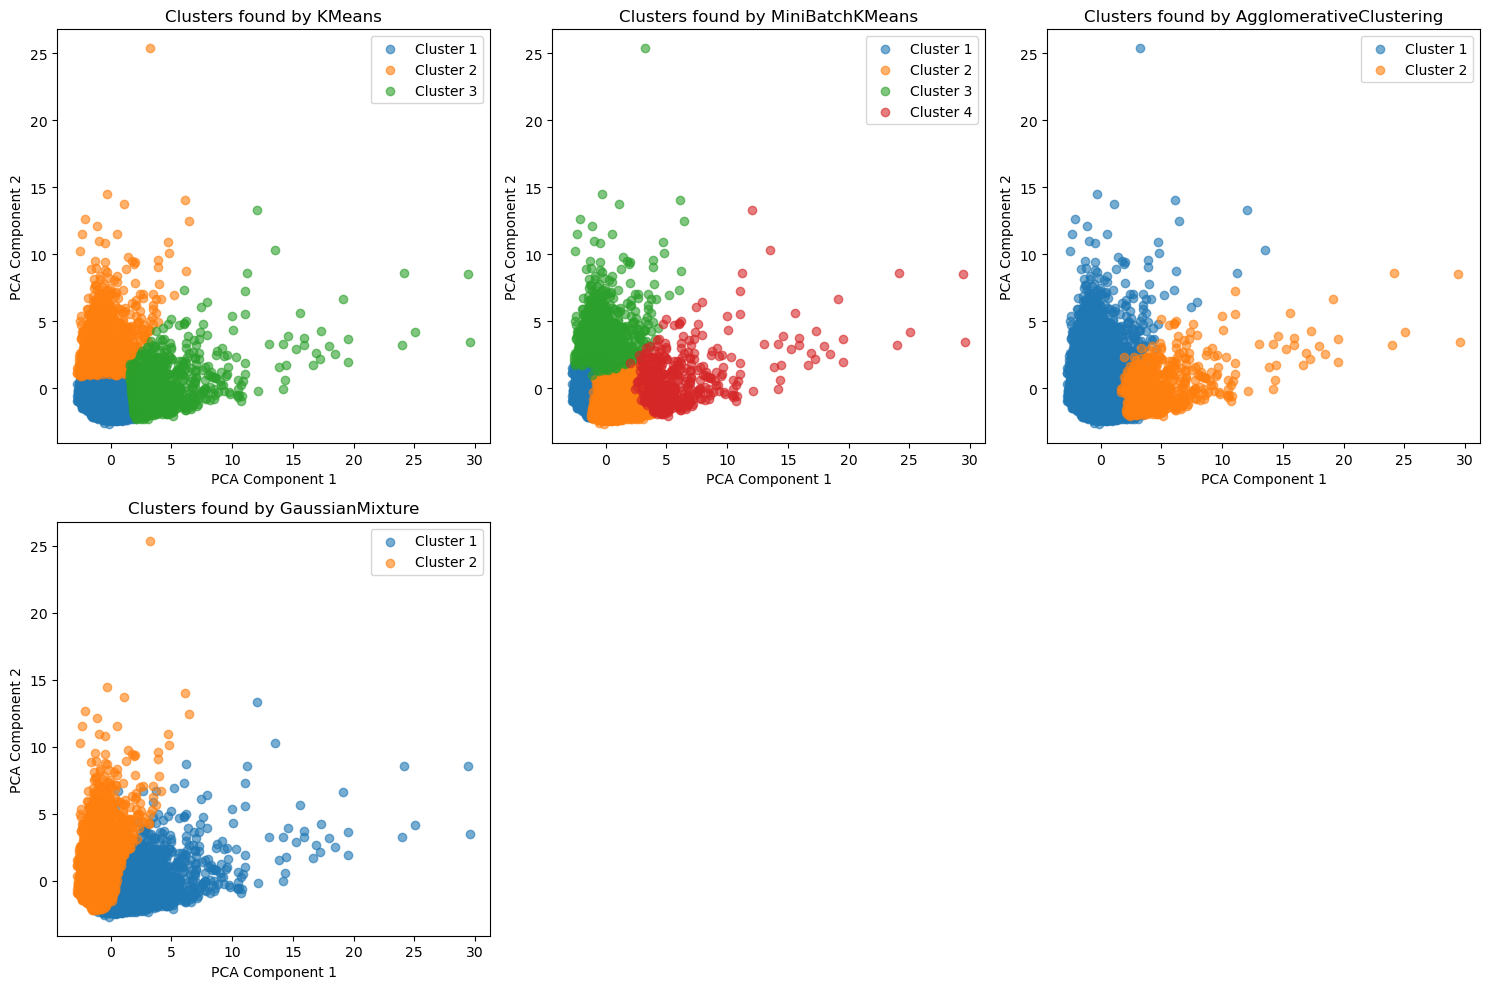

In [126]:
import matplotlib.pyplot as plt
import numpy as np

# Titles for the plots
algorithm_names = ['KMeans', 'MiniBatchKMeans', 'AgglomerativeClustering', 'GaussianMixture']
# Labels from the clustering algorithms
cluster_labels = [kmeans_labels, minibatch_kmeans_labels, agglo_labels, gmm_labels]

# Number of rows and cols for the subplot grid
n_rows = 2
n_cols = 3

def plot_cluster_grid(X, labels_list, names, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
    axes = axes.flatten()
    
    for i, (name, labels) in enumerate(zip(names, labels_list)):
        axes[i].set_title(f'Clusters found by {name}')
        clusters = np.unique(labels)
        for cluster in clusters:
            row_ix = np.where(labels == cluster)
            axes[i].scatter(X[row_ix, 0], X[row_ix, 1], label=f'Cluster {cluster + 1}', alpha=0.6)
        axes[i].set_xlabel('PCA Component 1')
        axes[i].set_ylabel('PCA Component 2')
        axes[i].legend()
    
    # Hide any unused subplots
    for ax in axes[len(names):]:
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Call the function with the PCA features, cluster labels, and algorithm names
plot_cluster_grid(pca_features, cluster_labels, algorithm_names, n_rows, n_cols)


### Inverse Transform

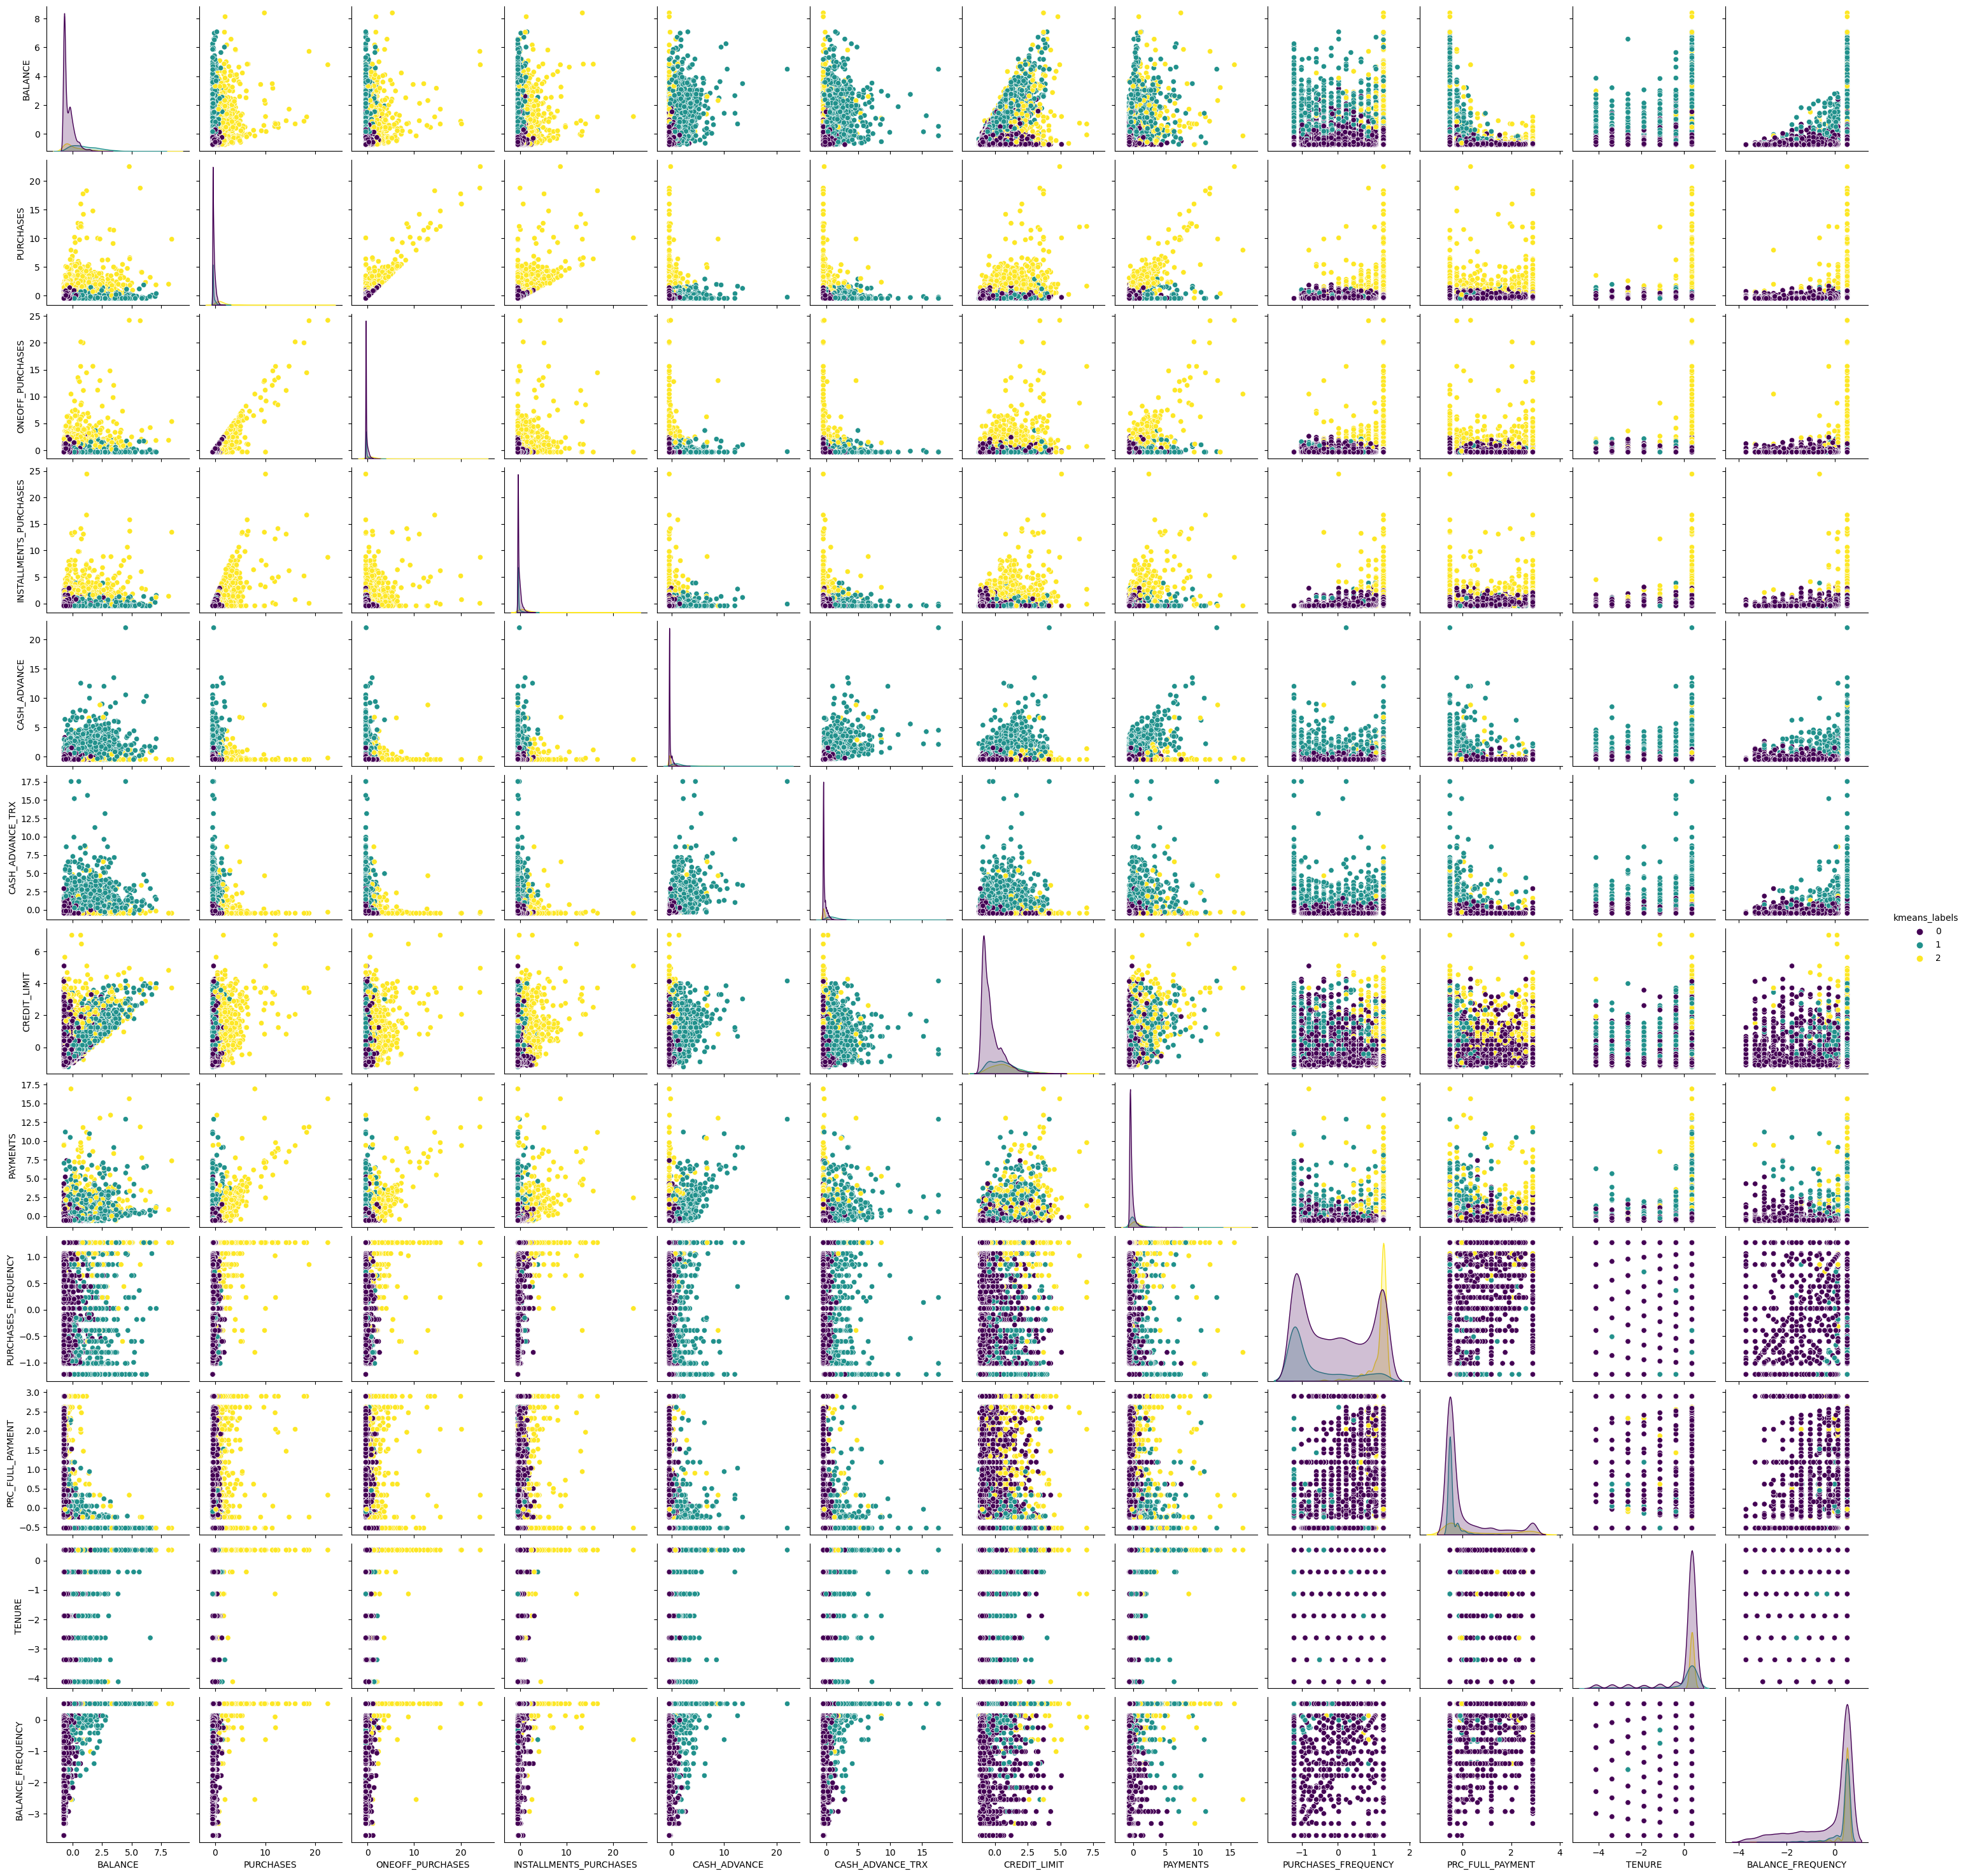

In [132]:
import seaborn as sns
import pandas as pd

scaled_features = pd.DataFrame(scaled_features)
scaled_features['kmeans_labels'] = kmeans_labels

variables_of_interest = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'PURCHASES_FREQUENCY', 'PRC_FULL_PAYMENT', 'TENURE', 'BALANCE_FREQUENCY']

sns.pairplot(scaled_features[variables_of_interest + ['kmeans_labels']], hue='kmeans_labels', palette='viridis')
plt.show()

The clusters above highly certain customer segments such as: 
1. High Value Customers: High tenure along with high purchases
2. Loan Oriented Customers: High cash advance with low full payments
3. Convenience Customers: High frequency of purchases, especially installments, indicating regular use of the card for day-to-day spending